In [118]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

In [119]:
df = pd.read_csv('C://Users/akaks/Downloads/laptop_data.csv')

In [120]:
df = df.drop('Unnamed: 0',axis=1)

In [121]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [123]:
df = df.drop_duplicates()

In [124]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [125]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


In [127]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Density'>

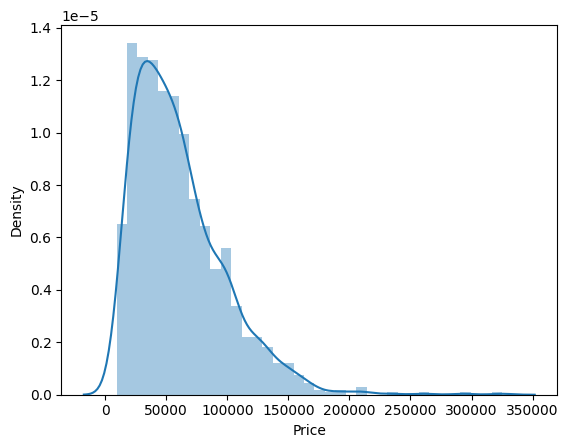

In [128]:
sns.distplot(df.Price)

<Axes: xlabel='Company'>

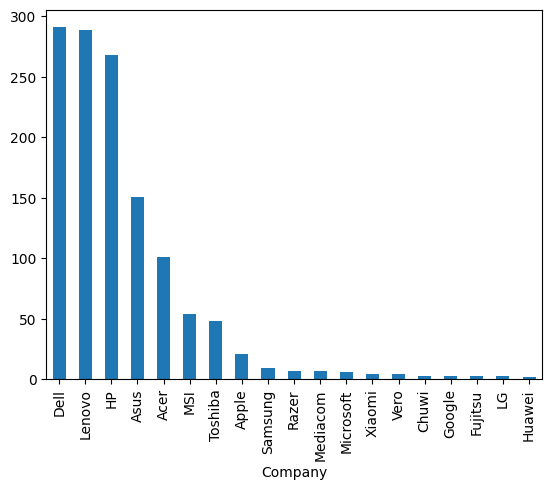

In [129]:
df['Company'].value_counts().plot(kind='bar')

In [130]:
import matplotlib.pyplot as plt

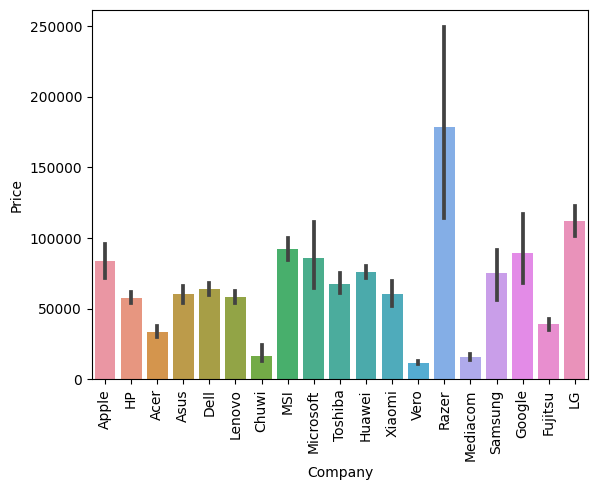

In [131]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

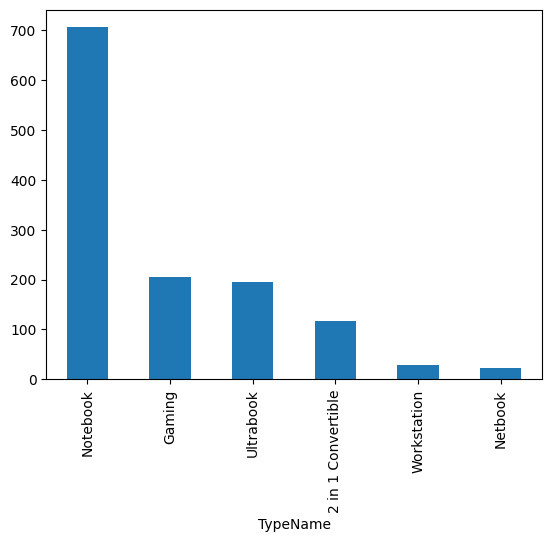

In [132]:
df.TypeName.value_counts().plot(kind='bar')

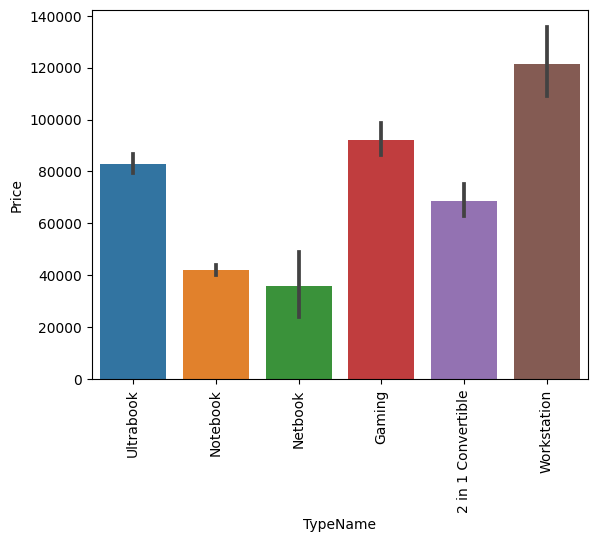

In [133]:
sns.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

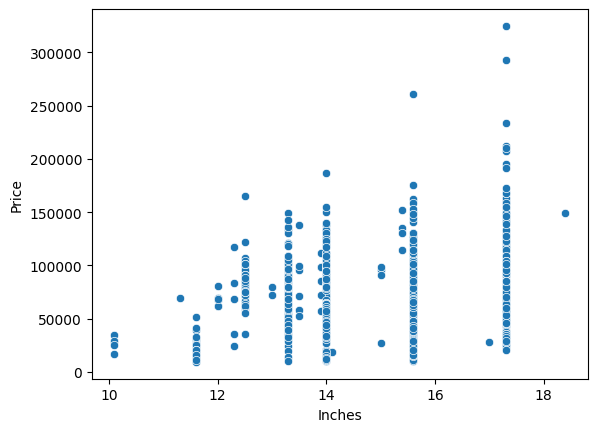

In [134]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [135]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [136]:
df['Touchscreen'] = df.ScreenResolution.apply(lambda x: 1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen'>

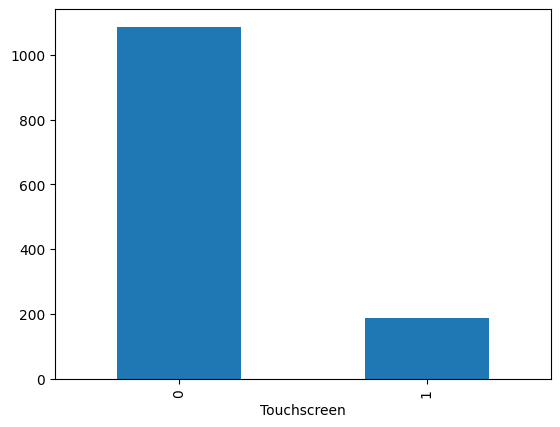

In [137]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

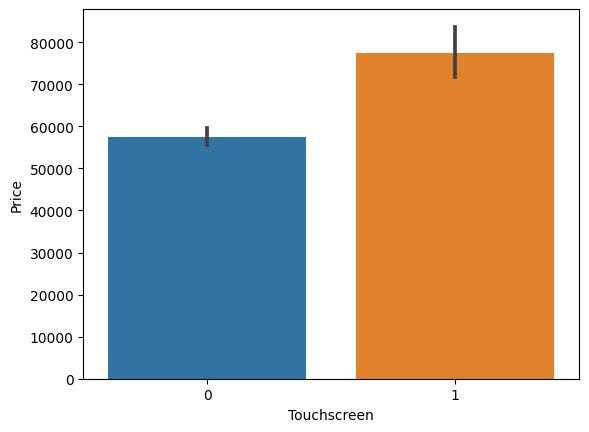

In [138]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [139]:
df['IPS'] = df.ScreenResolution.apply(lambda x: 1 if 'IPS' in x else 0)

<Axes: xlabel='IPS'>

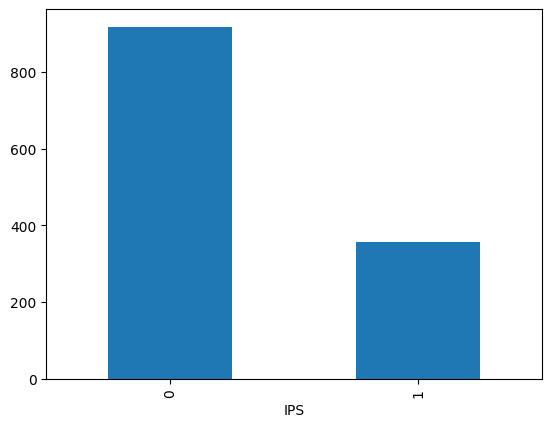

In [140]:
df.IPS.value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

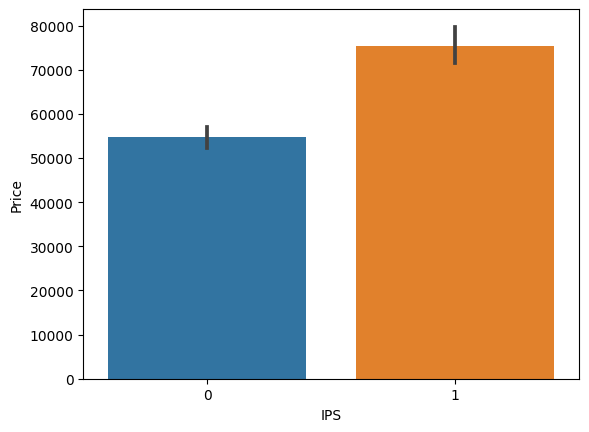

In [141]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [142]:
df['X'] = df.ScreenResolution.apply(lambda x: x.split()[-1]).str.split('x').apply(lambda x: x[0])
df['Y'] = df.ScreenResolution.apply(lambda x: x.split()[-1]).str.split('x').apply(lambda x: x[1])

In [143]:
df.X = df.X.astype('float')
df.Y = df.Y.astype('float')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X                 1274 non-null   float64
 14  Y                 1274 non-null   float64
dtypes: float32(1), float64(4), int32(1), int64(2), object(7)
memory usage: 149.3+ KB


In [145]:
df['PPI']=(((df['X']**2) +(df['Y']**2))**0.5/df['Inches']).astype('float')

In [146]:
df.drop(['ScreenResolution','X','Y','Inches'],axis=1,inplace=True)

In [147]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [148]:
def find_processor(text):
    if text == 'Intel Core i5' or text =='Intel Core i7' or text=='Intel Core i3' in text:
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel processor'
        else:
            return 'Amd processor'

In [149]:
df['Cpu name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))

In [150]:
df['Cpu brand'] = df['Cpu name'].apply(find_processor)

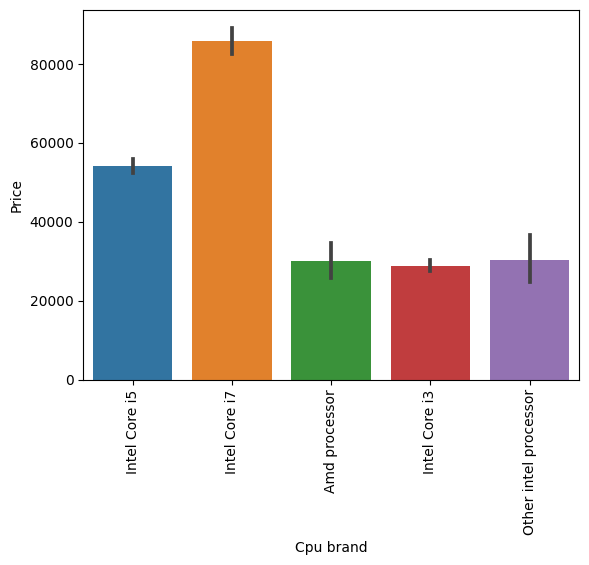

In [151]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [152]:
df.drop(['Cpu','Cpu name'],axis=1,inplace=True)

<Axes: xlabel='Ram', ylabel='Price'>

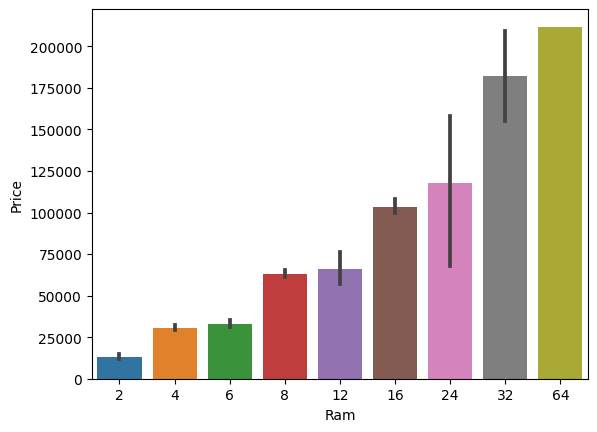

In [153]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [155]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')
df['first'] = df['first'].apply(lambda x: x.split()[0])
df['second'] = df['second'].apply(lambda x: x.split()[0])

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [157]:
df.drop('Memory',axis=1,inplace=True)

In [162]:
df['Gpu brand']=df.Gpu.apply(lambda x:x.split()[0])

In [164]:
df.drop('Gpu',axis=1,inplace=True)

In [168]:
def op_sys(text):
    if text=='macOS' or text=='Mac OS X':
        return 'Mac'
    elif text=='Windows 10' or text=='Windows 10 S' or text=='Windows 7':
        return 'Windows'
    else:
        return 'Other'

In [170]:
df.OpSys = df.OpSys.apply(op_sys)

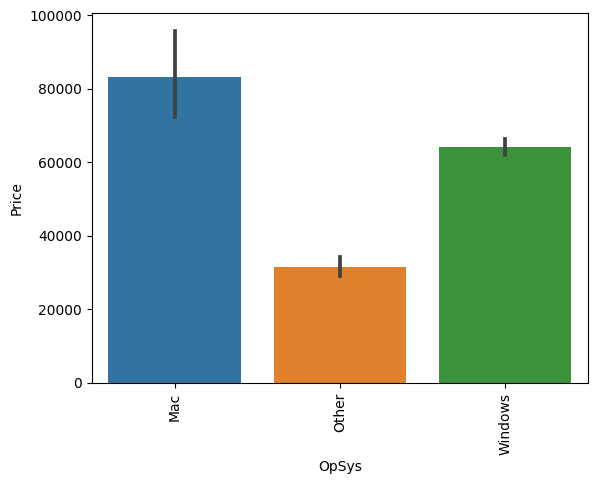

In [172]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [171]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [177]:
cat = []
con = []
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        con.append(i)

In [180]:
df[con].corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

<Axes: xlabel='Weight', ylabel='Price'>

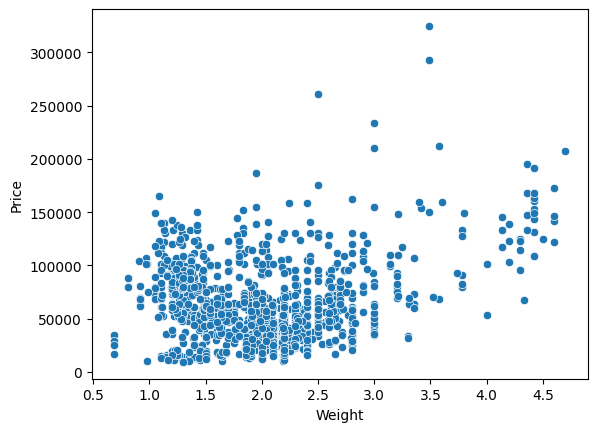

In [183]:
sns.scatterplot(y = df['Price'],x = df['Weight'])

<Axes: >

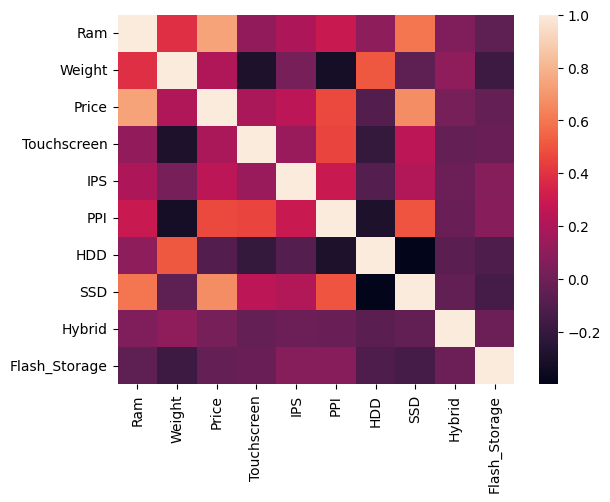

In [187]:
sns.heatmap(df[con].corr())

<Axes: xlabel='Price', ylabel='Density'>

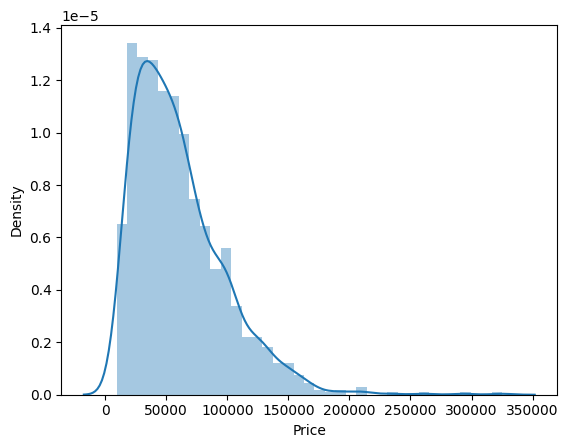

In [188]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

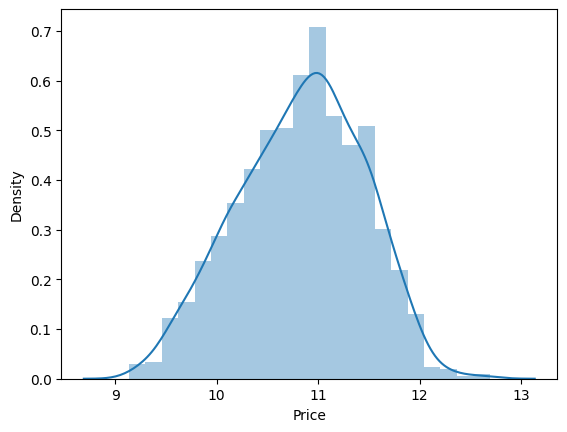

In [190]:
import numpy as np
sns.distplot(np.log(df['Price']))

In [195]:
df.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [196]:
x = df.drop(columns='Price')
y = np.log(df['Price'])

In [198]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Linear Regression

In [218]:
step1 = ColumnTransformer(transformers=[
    ('OHE',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
])

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)
print('R2 score',r2_score(ytest,ypred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.6784060009587548
MAE 0.20702995769270596


In [219]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8319035271826462
MAE 0.20702995769270596


In [210]:
xtrain

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
294,Lenovo,Notebook,8,Windows,2.05,0,0,141.211998,Intel Core i5,0,256,Intel
228,Asus,Notebook,8,Windows,2.69,0,0,127.335675,Intel Core i5,500,256,Nvidia
1159,HP,2 in 1 Convertible,8,Windows,1.48,1,0,220.842824,Intel Core i7,0,512,Intel
703,Lenovo,Notebook,4,Windows,2.10,0,0,141.211998,Intel Core i5,2000,0,Intel
1200,Dell,Notebook,4,Windows,2.30,0,0,100.454670,Intel Core i3,0,128,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
936,Dell,Notebook,4,Windows,2.18,0,0,100.454670,Intel Core i3,1000,0,Intel
880,HP,2 in 1 Convertible,4,Windows,1.28,1,0,165.632118,Intel Core i5,0,256,Intel
838,Lenovo,Notebook,4,Other,1.50,0,0,111.935204,Other intel processor,0,0,Intel
874,Samsung,Ultrabook,16,Windows,1.23,0,0,146.860478,Intel Core i7,0,256,Nvidia


In [213]:
xtrain

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
294,Lenovo,Notebook,8,Windows,2.05,0,0,141.211998,Intel Core i5,0,256,Intel
228,Asus,Notebook,8,Windows,2.69,0,0,127.335675,Intel Core i5,500,256,Nvidia
1159,HP,2 in 1 Convertible,8,Windows,1.48,1,0,220.842824,Intel Core i7,0,512,Intel
703,Lenovo,Notebook,4,Windows,2.10,0,0,141.211998,Intel Core i5,2000,0,Intel
1200,Dell,Notebook,4,Windows,2.30,0,0,100.454670,Intel Core i3,0,128,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...
936,Dell,Notebook,4,Windows,2.18,0,0,100.454670,Intel Core i3,1000,0,Intel
880,HP,2 in 1 Convertible,4,Windows,1.28,1,0,165.632118,Intel Core i5,0,256,Intel
838,Lenovo,Notebook,4,Other,1.50,0,0,111.935204,Other intel processor,0,0,Intel
874,Samsung,Ultrabook,16,Windows,1.23,0,0,146.860478,Intel Core i7,0,256,Nvidia


# Ridge

In [224]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8263406487537717
MAE 0.21303557869527348


# Lasso

In [226]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8243860730990172
MAE 0.21397003426998878


# KNN

In [230]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.7817433858272872
MAE 0.22656069481027036


# Decision Tree

In [236]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.791401808115853
MAE 0.22091113460139133


# Random Forest

In [242]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=16)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8719629688441913
MAE 0.17600994443812487


# Extra Tree Regressor

In [245]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8404334864987795
MAE 0.184934668546686


# Adaboost

In [248]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.7863334392059276
MAE 0.23155746297361646


## Gradient Boost

In [250]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8835725435708712
MAE 0.16393894214540358


# XGBoost

In [251]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.877753341652579
MAE 0.17229402810647976


# Voting Regressor

In [257]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8768054884110604
MAE 0.17153359935379933


In [258]:
#Random Forest is giving the best result so we will use the Random Forest Regressor to predict the Laptop Price

In [259]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=16)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(xtrain,ytrain)

y_pred = pipe.predict(xtest)

print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.8719629688441913
MAE 0.17600994443812487


In [304]:
xtest

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
725,Lenovo,Notebook,4,Other,1.90,0,0,100.454670,Intel Core i5,1000,0,Intel
426,Dell,Notebook,8,Windows,2.02,0,0,141.211998,Intel Core i7,2000,256,AMD
414,Asus,2 in 1 Convertible,8,Windows,1.27,1,1,165.632118,Intel Core i5,0,256,Intel
99,HP,Gaming,12,Windows,2.62,0,1,141.211998,Intel Core i7,1000,128,Nvidia
924,Lenovo,2 in 1 Convertible,8,Windows,1.37,1,1,165.632118,Intel Core i5,0,512,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1042,Toshiba,Notebook,16,Windows,2.40,0,1,141.211998,Intel Core i7,0,256,Nvidia
58,MSI,Gaming,16,Windows,2.43,0,0,127.335675,Intel Core i7,2000,256,Nvidia
1209,Asus,Gaming,16,Windows,2.20,0,0,141.211998,Intel Core i7,1000,256,Nvidia
258,MSI,Gaming,16,Windows,4.14,0,0,127.335675,Intel Core i7,1000,512,Nvidia
